Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

1) Load and Explore the given data

In [2]:
#load customers data from csv
cgf = pd.read_csv("CardioGoodFitness.csv")

In [3]:
#Total number of customers
cgf.shape

(180, 9)

In [4]:
#columns in the dataset
cgf.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
#check if there are any missing values with customers record
cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
#Columns, not null count, dtype of the given dataset. 
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
#Review top 10 records as a sample
cgf.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [8]:
#Review bottom five customer records as a sample
cgf.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [9]:
#Statistical summary of the entire dataset
cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


2) Exploring and analyzing categorical data 

In [10]:
#Unique Product details
cgf['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [11]:
#Number of customers who owns each product
cgf['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Observations:- There are 3 unique products.Most customers bought TM195.

In [12]:
#Number of male,female customers
cgf['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Observations:- More male customers purchased tredmill products from this retail store than female customers

In [13]:
#Customers based on marital status
cgf['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Observations:- More customers are partnered 

3) Explore numerical data

In [14]:
cgf['Education'].value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

Observations:- 3/4 or around 75% of customers have atleast 14 years education or above

In [15]:
cgf['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Observations:- Most customers use treadmills atleast twice a week

4) Observation of Customer Characteristics

In [16]:
#Shows Fitness level by Product. 
datacross= pd.crosstab(cgf['Product'],cgf['Fitness'])
datacross

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


Members with highest fitness own TM798 model.At the same time TM195 model highly popular among lower fitness level

In [17]:
#Median age group of customers for each product
cgf.groupby(['Product'])['Age'].median()

Product
TM195    26
TM498    26
TM798    27
Name: Age, dtype: int64

In [18]:
#TM195 is more popular among both men and women
cgf.groupby(['Product'])['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

TM195 and TM498 both are equally popular from both male,female customers. 
But when it comes to TM798 male customers own more

In [19]:
#TM195 used more often followed by TM498,TM798
fitnessbyusage= cgf.groupby(cgf['Product'])['Usage'].count()
fitnessbyusage

Product
TM195    80
TM498    60
TM798    40
Name: Usage, dtype: int64

In [20]:
#Number of miles run by using each product
fitnessbymiles = cgf.groupby('Product').agg(min_miles = ('Miles', 'min'), mean_miles = ('Miles', 'mean'),max_miles = ('Miles', 'max')).round(2)
fitnessbymiles

,min_miles,mean_miles,max_miles
Product,,,
TM195,38,82.79,188
TM498,21,87.93,212
TM798,80,166.90,360


customers who own TM798 run longer distance than customers with other producs

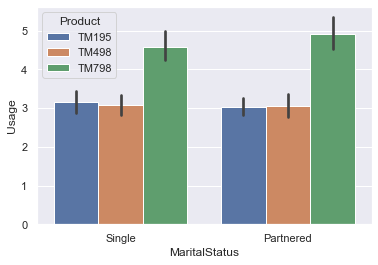

In [21]:
#Product usage
sns.barplot(cgf["MaritalStatus"],cgf["Usage"], hue=cgf["Product"]);

Product TM798 is highly used among both single and partnered

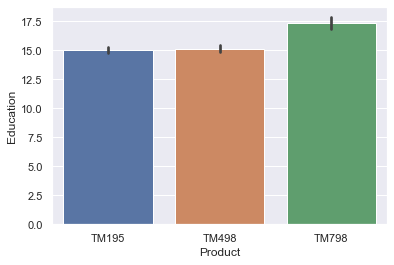

In [22]:
#Product purchase in terms of education level
sns.barplot(cgf["Product"],cgf["Education"]);

It looks like TM798 is prefered treadmill for customers with highest education

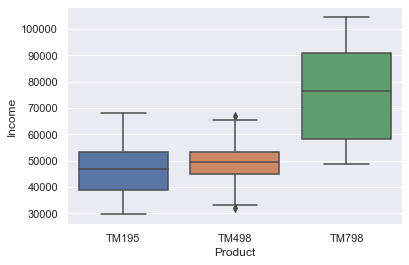

In [23]:
sns.boxplot(cgf["Product"],cgf["Income"]);

Higher income members also go with TM798 product

<AxesSubplot:xlabel='Product', ylabel='Age'>

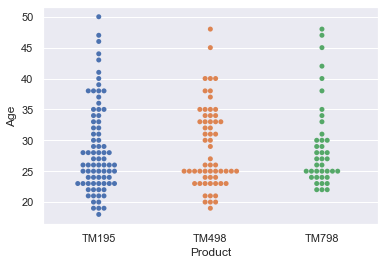

In [24]:
#All products are equally popular with members around age of 25
sns.swarmplot(cgf["Product"],cgf["Age"])

Customer Profile based on above analysis

    1) Higher income, higher education,high fitness customers prefer TM798. 
    2) TM195 or TM498 bought by more frequent runners
    3) High fitness level customers who run more miles in a single run prefer TM798 
    4) More customers are partnered 

5) Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

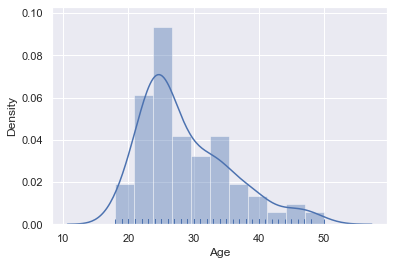

In [25]:
#Customer by age group
sns.distplot(cgf['Age'], rug=True)

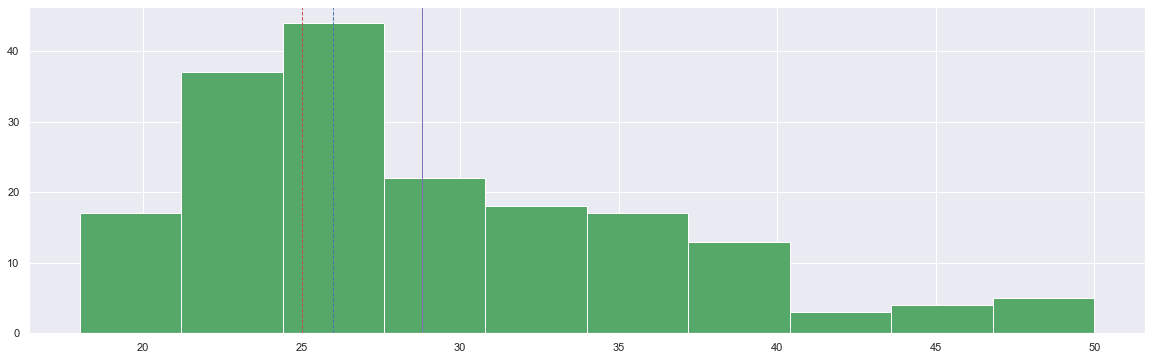

In [26]:
plt.figure(figsize=(20,6)) 
plt.hist(cgf['Age'], color='g') 
plt.axvline(cgf['Age'].mean(), color='m', linewidth=1)
plt.axvline(cgf['Age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cgf['Age'].mode()[0], color='r', linestyle='dashed', linewidth=1)

Based on above observations we can see there are very few customers after thier 40s. This gives an idea about the customer demographic

<AxesSubplot:xlabel='Age', ylabel='Density'>

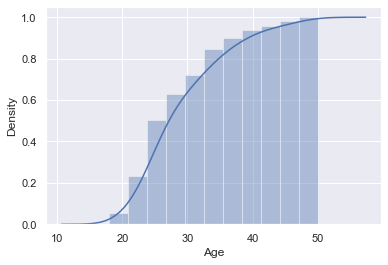

In [27]:
#Cumulative distribution
sns.distplot(cgf['Age'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

Additional analysis based on income and education

(array([ 3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0., 55.,  0.,
         0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0., 85.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.]),
 array([12.  , 12.18, 12.36, 12.54, 12.72, 12.9 , 13.08, 13.26, 13.44,
        13.62, 13.8 , 13.98, 14.16, 14.34, 14.52, 14.7 , 14.88, 15.06,
        15.24, 15.42, 15.6 , 15.78, 15.96, 16.14, 16.32, 16.5 , 16.68,
        16.86, 17.04, 17.22, 17.4 , 17.58, 17.76, 17.94, 18.12, 18.3 ,
        18.48, 18.66, 18.84, 19.02, 19.2 , 19.38, 19.56, 19.74, 19.92,
        20.1 , 20.28, 20.46, 20.64, 20.82, 21.  ]),
 <BarContainer object of 50 artists>)

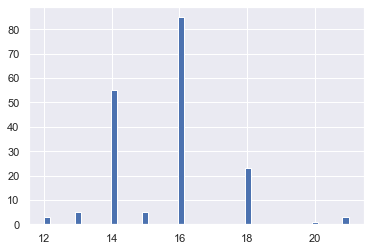

In [28]:
#Customers by education level
Educationdata = cgf['Education']
plt.hist(Educationdata, bins=50)

Most customers fall into three level of education

<AxesSubplot:xlabel='Income'>

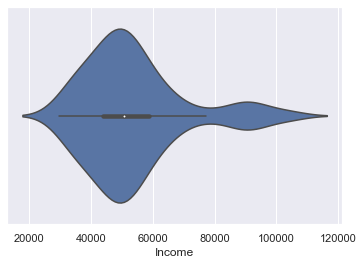

In [29]:
#Customers by income
Incomedata = cgf['Income']
sns.violinplot(Incomedata)

More customers fall between 40k to 60k income range

6) Multivariate Analysis

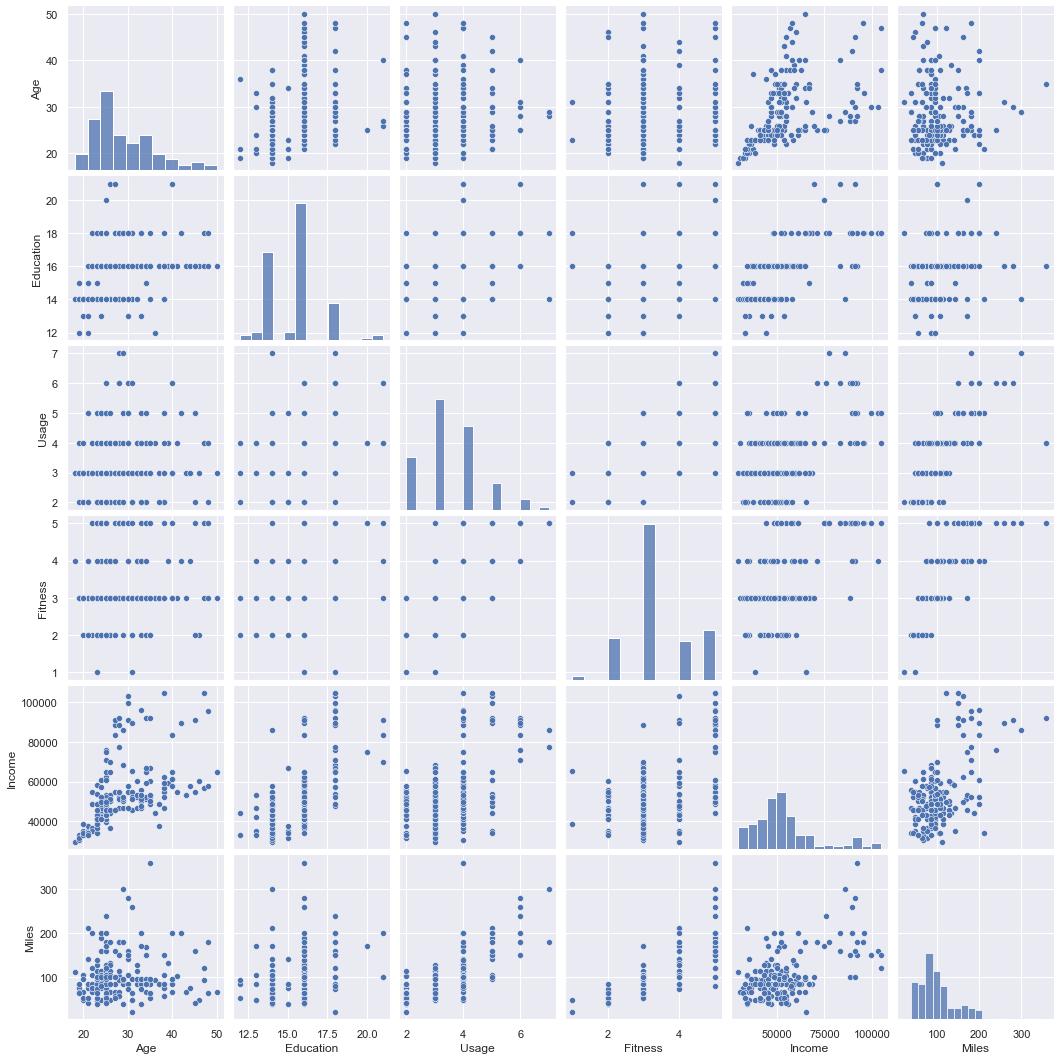

In [30]:
sns.pairplot(cgf)

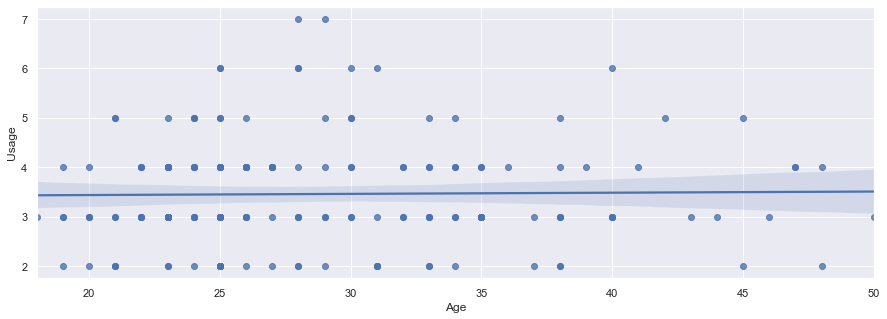

In [31]:
figure=plt.figure(figsize=(15,5))
ax=sns.regplot(x='Age',y='Usage',data=cgf)

<AxesSubplot:xlabel='Age', ylabel='Miles'>

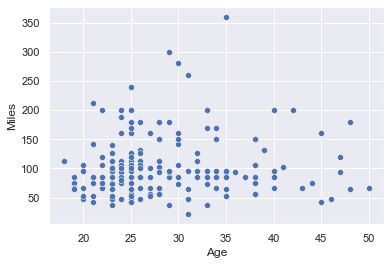

In [32]:
sns.scatterplot(cgf['Age'], cgf['Miles']) 

Miles run and more usage in younger age customers. More miles and usage is very high with age of 27

In [33]:
cgf.corr() 

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

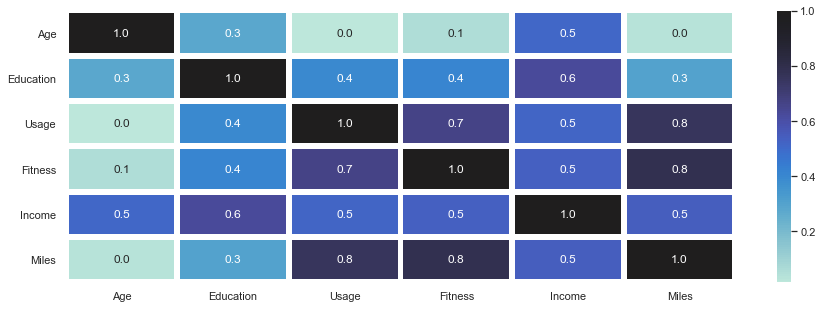

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(cgf.corr(),annot=True,linewidths=5, fmt='.1f',center=1)